<a href="https://colab.research.google.com/github/hugegene/O-Net/blob/master/Onet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!kill -9 -1

# Load Library and Data

In [0]:
# NVIDIA profiling tool for the available GPU
!nvidia-smi
# CLone my repo that contains the shell file
!git clone https://gist.github.com/f7b7c7758a46da49f84bc68b47997d69.git

Thu Dec 27 04:48:28 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 396.44                 Driver Version: 396.44                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   29C    P8    30W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
!ls 

pytorch041_cuda92_colab.sh


In [0]:
# Move to te directory where the file was donwloaded
cd f7b7c7758a46da49f84bc68b47997d69/

/content/f7b7c7758a46da49f84bc68b47997d69


In [0]:
# Execute the shell script. 
# NOTE: This takes sometime and it breaks the connection. Better use the steps after and execute them one by one.

#!bash pytorch041_cuda92_colab.sh
!wget https://developer.nvidia.com/compute/cuda/9.2/Prod2/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.148-1_amd64
  
!dpkg --install cuda-repo-ubuntu1604-9-2-local_9.2.148-1_amd64

!apt-key add /var/cuda-repo-9-2-local/7fa2af80.pub

!apt-get update

# NOTE: This might take some time..
!apt-get install cuda

# Check the version of CUDA on the system
!cat /usr/local/cuda/version.txt

!pip install http://download.pytorch.org/whl/cu92/torch-0.4.1-cp36-cp36m-linux_x86_64.whl
  
!pip install torchvision

# Use PyTorch to check versions, CUDA version and cuDNN

import torch

print("PyTorch version: ")
print(torch.__version__)
print("CUDA Version: ")
print(torch.version.cuda)
print("cuDNN version is: ")
print(torch.backends.cudnn.version())

!nvidia-smi

--2018-12-27 04:48:37--  https://developer.nvidia.com/compute/cuda/9.2/Prod2/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.148-1_amd64
Resolving developer.nvidia.com (developer.nvidia.com)... 192.229.162.216
Connecting to developer.nvidia.com (developer.nvidia.com)|192.229.162.216|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/9.2/secure/Prod2/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.148-1_amd64.deb?LtZC5o1LoFycw7J1aZ-VaS-ct2f6tZuX0YFbRFpH6B9-zOVDXE5SnvMPtgEuXH88TD5u-P12uFOnpIUOEeKqe_-0oupjQRyhAQN9YUcSaDa3tTKWiGA9kief90qhlg9n4862CZ1keQJ-oeMa96nv6VwpKUil350U2HvH4v37_q_449qQb3FHBZwsKw5dzdE1iM4ynnWl7a6psacXOL4v8w [following]
--2018-12-27 04:48:38--  https://developer.download.nvidia.com/compute/cuda/9.2/secure/Prod2/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.148-1_amd64.deb?LtZC5o1LoFycw7J1aZ-VaS-ct2f6tZuX0YFbRFpH6B9-zOVDXE5SnvMPtgEuXH88TD5u-P12uFOnpIUOEeKqe_-0oupjQRyhAQN9YUcSaDa3t

In [0]:
 torch.cuda.is_available()

True

In [0]:
cd ../

/content


In [0]:
!ls

f7b7c7758a46da49f84bc68b47997d69  sample_data


In [0]:
from google.colab import files
uploaded = files.upload()

Saving DRIVE.zip to DRIVE.zip


In [0]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [0]:
# !pip3 install http://download.pytorch.org/whl/cpu/torch-0.4.1-cp36-cp36m-linux_x86_64.whl
# !pip3 install fastai

In [0]:
# from fastai.conv_learner import *
# from fastai.dataset import *
# from fastai import metrics
# from fastai.vision import *
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from pathlib import Path
import numpy as np
import json
import os
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor
from torch.utils.data import Dataset, DataLoader
import torchvision.models as models
import torch.optim as optim
import torch
from torchvision import transforms, utils
torch.cuda.set_device(-1)
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable as V
from tqdm import tqdm

from PIL import Image
# def register_extension(id, extension): Image.EXTENSION[extension.lower()] = id.upper()
# Image.register_extension = register_extension
# def register_extensions(id, extensions): 
#   for extension in extensions: register_extension(id, extension)
# Image.register_extensions = register_extensions

In [0]:
!pip uninstall -y Pillow
# install the new one
!pip install Pillow==5.3.0
# import the new one
import PIL
print(PIL.PILLOW_VERSION)

Uninstalling Pillow-5.3.0:
  Successfully uninstalled Pillow-5.3.0
  Using cached https://files.pythonhosted.org/packages/62/94/5430ebaa83f91cc7a9f687ff5238e26164a779cca2ef9903232268b0a318/Pillow-5.3.0-cp36-cp36m-manylinux1_x86_64.whl
4.0.0


In [0]:
!ls

cuda-repo-ubuntu1604-9-2-local_9.2.148-1_amd64	DRIVE  DRIVE.zip  sample_data


In [0]:
rm -rf 'DRIVE/tmp' 'DRIVE/images_png-128' 'DRIVE/images_masks_png' 'DRIVE/images_png' 'DRIVE/images_masks-128'

In [0]:
!unzip DRIVE.zip

[autoreload of PIL.Image failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ImportError: cannot import name 'py3'
]
[autoreload of PIL._binary failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ImportError: cannot import name 'py3'
]


Archive:  DRIVE.zip
   creating: DRIVE/test/
   creating: DRIVE/test/1st_manual/
   creating: DRIVE/test/2nd_manual/
  inflating: DRIVE/test/2nd_manual/01_manual2.gif  
  inflating: DRIVE/test/2nd_manual/02_manual2.gif  
  inflating: DRIVE/test/2nd_manual/03_manual2.gif  
  inflating: DRIVE/test/2nd_manual/04_manual2.gif  
  inflating: DRIVE/test/2nd_manual/05_manual2.gif  
  inflating: DRIVE/test/2nd_manual/06_manual2.gif  
  inflating: DRIVE/test/2nd_manual/07_manual2.gif  
  inflating: DRIVE/test/2nd_manual/08_manual2.gif  
  inflating: DRIVE/test/2nd_manual/09_manual2.gif  
  inflating: DRIVE/test/2nd_manual/10_manual2.gif  
  inflating: DRIVE/test/2nd_manual/11_manual2.gif  
  inflating: DRIVE/test/2nd_manual/12_manual2.gif  
  inflating: DRIVE/test/2nd_manual/13_manual2.gif  
  inflating: DRIVE/test/2nd_manual/14_manual2.gif  
  inflating: DRIVE/test/2nd_manual/15_manual2.gif  
  inflating: DRIVE/test/2nd_manual/16_manual2.gif  
  inflating: DRIVE/test/2nd_manual/17_manual2.gif  

# Showing Images

In [0]:
!ls DRIVE/training/images

01_test.tif  09_test.tif  17_test.tif	   25_training.tif  33_training.tif
02_test.tif  10_test.tif  18_test.tif	   26_training.tif  34_training.tif
03_test.tif  11_test.tif  19_test.tif	   27_training.tif  35_training.tif
04_test.tif  12_test.tif  20_test.tif	   28_training.tif  36_training.tif
05_test.tif  13_test.tif  21_training.tif  29_training.tif  37_training.tif
06_test.tif  14_test.tif  22_training.tif  30_training.tif  38_training.tif
07_test.tif  15_test.tif  23_training.tif  31_training.tif  39_training.tif
08_test.tif  16_test.tif  24_training.tif  32_training.tif  40_training.tif


In [0]:
PATH = Path('DRIVE')
IMG_PATH = PATH/'training/images'
CSV_PATH = PATH/'files.csv'
TMP_PATH = PATH/'tmp'
TMP_PATH.mkdir(exist_ok=True)

In [0]:
def show_img(im, figsize=None, ax=None, alpha=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im, alpha=alpha)
    ax.set_axis_off()
    return ax

(584, 565, 3)

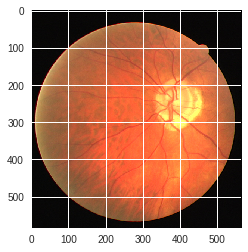

In [0]:
image = plt.imread(PATH/'training/images/31_training.tif')
plt.imshow(image)
image.shape

In [0]:
eye  =  '21'

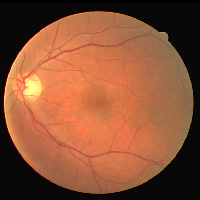

In [0]:
Image.open(PATH/f'training/images/{eye}_training.tif').resize((200,200))

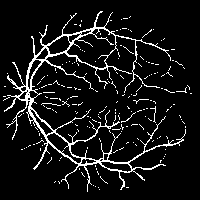

In [0]:
 Image.open(PATH/'training/1st_manual/35_manual1.gif').resize((200,200))

In [0]:
list((PATH/'training/1st_manual').iterdir())[:5]

[PosixPath('DRIVE/training/1st_manual/35_manual1.gif'),
 PosixPath('DRIVE/training/1st_manual/05_manual1.gif'),
 PosixPath('DRIVE/training/1st_manual/33_manual1.gif'),
 PosixPath('DRIVE/training/1st_manual/25_manual1.gif'),
 PosixPath('DRIVE/training/1st_manual/16_manual1.gif')]

In [0]:
list((PATH).iterdir())

[PosixPath('DRIVE/tmp'), PosixPath('DRIVE/training'), PosixPath('DRIVE/test')]

# Set Up Folders

In [0]:
SIZE = 128

(PATH/'images_masks_png').mkdir(exist_ok=True)
def convert_img(fn):
    fn = fn.name
    Image.open(PATH/'training/1st_manual'/fn).save(PATH/'images_masks_png'/f'{fn[:-4]}.png')

files = list((PATH/'training/1st_manual').iterdir())
with ThreadPoolExecutor(8) as e: e.map(convert_img, files)
  

(PATH/'images_masks-128').mkdir(exist_ok=True)

def resize_mask(fn):
    Image.open(fn).resize((SIZE,SIZE)).save((fn.parent.parent)/'images_masks-128'/fn.name)

files = list((PATH/'images_masks_png').iterdir())
with ThreadPoolExecutor(8) as e: e.map(resize_mask, files)
  

  
(PATH/'images_png').mkdir(exist_ok=True)

def convert_im(fn):
    fn = fn.name
    Image.open(PATH/'training/images'/fn).save(PATH/'images_png'/f'{fn[:-4]}.png')
    
files = list((PATH/'training/images').iterdir())
with ThreadPoolExecutor(8) as e: e.map(convert_im, files)
  

  
(PATH/'images_png-128').mkdir(exist_ok=True)

def resize_img(fn):
    Image.open(fn).resize((SIZE,SIZE)).save((fn.parent.parent)/'images_png-128'/fn.name)

files = list((PATH/'images_png').iterdir())
with ThreadPoolExecutor(8) as e: e.map(resize_img, files)

In [0]:
rm -rf 'DRIVE/images_png-128' 'DRIVE/images_masks-128' 'DRIVE/images_png' 'DRIVE/images_masks_png' 

In [0]:
list((PATH/"images_png-128").iterdir())

[PosixPath('DRIVE/images_png-128/09_test.png'),
 PosixPath('DRIVE/images_png-128/34_training.png'),
 PosixPath('DRIVE/images_png-128/06_test.png'),
 PosixPath('DRIVE/images_png-128/17_test.png'),
 PosixPath('DRIVE/images_png-128/11_test.png'),
 PosixPath('DRIVE/images_png-128/20_test.png'),
 PosixPath('DRIVE/images_png-128/22_training.png'),
 PosixPath('DRIVE/images_png-128/02_test.png'),
 PosixPath('DRIVE/images_png-128/01_test.png'),
 PosixPath('DRIVE/images_png-128/07_test.png'),
 PosixPath('DRIVE/images_png-128/08_test.png'),
 PosixPath('DRIVE/images_png-128/14_test.png'),
 PosixPath('DRIVE/images_png-128/15_test.png'),
 PosixPath('DRIVE/images_png-128/40_training.png'),
 PosixPath('DRIVE/images_png-128/26_training.png'),
 PosixPath('DRIVE/images_png-128/37_training.png'),
 PosixPath('DRIVE/images_png-128/33_training.png'),
 PosixPath('DRIVE/images_png-128/38_training.png'),
 PosixPath('DRIVE/images_png-128/04_test.png'),
 PosixPath('DRIVE/images_png-128/30_training.png'),
 PosixPa

In [0]:
files = sorted(PATH.glob('images_png-128/*.png'))

# with CSV_PATH.open('w') as fo:
#     for f in files: 
# #       print('a')
#       fo.write(f'{f.relative_to(IMG_PATH)},0\n')
x_names = []
y_names =[]
for file in files:
  x_names.append(str(file)[6:])
  
files = sorted(PATH.glob('images_masks-128/*.png'))

for file in files:
#   print(str(file)[23:])
  y_names.append(str(file)[6:])
  
x_names = np.asarray(x_names)
y_names = np.asarray(y_names)

x_names,y_names
x_names[20:]

array(['images_png-128/21_training.png', 'images_png-128/22_training.png',
       'images_png-128/23_training.png', 'images_png-128/24_training.png',
       'images_png-128/25_training.png', 'images_png-128/26_training.png',
       'images_png-128/27_training.png', 'images_png-128/28_training.png',
       'images_png-128/29_training.png', 'images_png-128/30_training.png',
       'images_png-128/31_training.png', 'images_png-128/32_training.png',
       'images_png-128/33_training.png', 'images_png-128/34_training.png',
       'images_png-128/35_training.png', 'images_png-128/36_training.png',
       'images_png-128/37_training.png', 'images_png-128/38_training.png',
       'images_png-128/39_training.png', 'images_png-128/40_training.png'],
      dtype='<U30')

In [0]:
class ODataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, x_names,y_names, transform= None):
        self.x_names = x_names
        self.y_names = y_names
        self.transform = transform

    def __len__(self):
        return len(self.x_names)

    def __getitem__(self, idx):
        image = self.transform(Image.open(PATH/x_names[idx]))
        target = self.transform(Image.open(PATH/y_names[idx]))

        return image, target

In [0]:
transform = transforms.Compose([
#     transforms.RandomCrop(32, padding=4),
#     transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
#     transforms.Normalize(rgb_mean, rgb_std),
])

trainDataset = ODataset(x_names[20:],y_names[20:], transform)
validateDataset = ODataset(x_names[:20],y_names[:20], transform)

In [0]:
batch_size = 2

train_loader = torch.utils.data.DataLoader(trainDataset, batch_size=batch_size)

val_loader = torch.utils.data.DataLoader(validateDataset, batch_size=batch_size)

x,y = next(iter(train_loader))
x,y = next(iter(val_loader))
y.shape

torch.Size([2, 1, 128, 128])

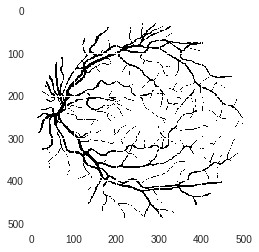

In [0]:
plt.imshow(y[0].numpy().reshape(512,512))

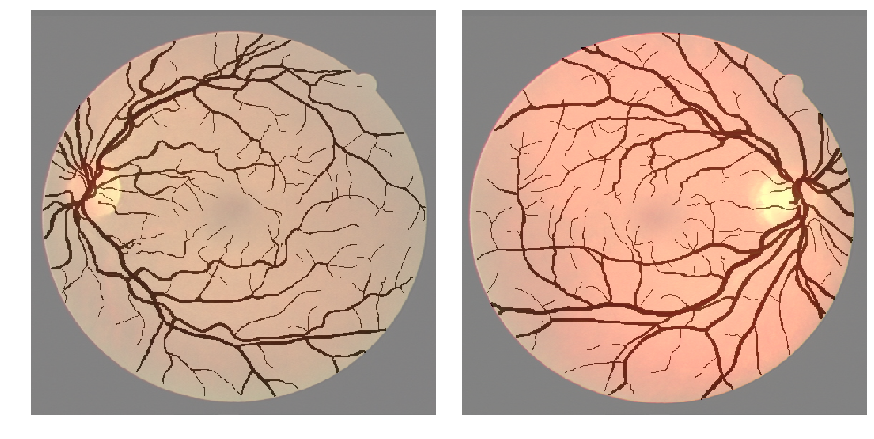

In [0]:
fig, axes = plt.subplots(1, 2, figsize=(12, 10))
for i,ax in enumerate(axes.flat):
    ax=show_img(x[i].numpy().transpose(1,2,0), ax=ax)
    show_img(y[i].numpy().reshape(512,512), ax=ax, alpha=0.5)
plt.tight_layout(pad=0.1)

## FastAI dataloader

In [0]:
TRAIN_DN = 'images_png-128'
MASKS_DN = 'images_masks-128'
sz = 128
bs = 2

class MatchedFilesDataset(Dataset):
    def __init__(self, fnames, y, transform, path):
        self.y=y
        assert(len(fnames)==len(y))
        super().__init__(fnames, transform, path)
    def get_y(self, i): return open_image(os.path.join(self.path, self.y[i]))
    def get_c(self): return 0

In [0]:
!ls

DRIVE  DRIVE.zip  sample_data


In [0]:
aug_tfms = [RandomRotate(4, tfm_y=TfmType.CLASS),
            RandomFlip(tfm_y=TfmType.CLASS),
            RandomLighting(0.05, 0.05)]

tfms = tfms_from_model(resnet34, sz, crop_type=CropType.NO, tfm_y=TfmType.CLASS, aug_tfms=aug_tfms)

datasets = ImageData.get_ds(MatchedFilesDataset, (trn_x,trn_y), (val_x,val_y), tfms, path=PATH/"")
md = ImageData(PATH, datasets, bs, num_workers=8, classes=None)

In [0]:
denorm = md.trn_ds.denorm
x,y = next(iter(md.aug_dl))
x = denorm(x)

In [0]:
fig, axes = plt.subplots(1, 2, figsize=(12, 10))
for i,ax in enumerate(axes.flat):
    ax=show_img(x[i], ax=ax)
    show_img(y[i], ax=ax, alpha=0.5)
plt.tight_layout(pad=0.1)

# CircleNet

In [0]:
resnet34 = models.resnet34(pretrained=True)
# circleres1 = resnet34
# circleres2 = resnet34
fullres = resnet34
# cut,lr_cut = model_meta[circleres1]

# def get_Circlebase():
#     layers = cut_model(circleres1(True), cut)
#     return nn.Sequential(*layers)
  
# def get_Circlebase2():
#     layers = cut_model(circleres2(True), cut)
#     return nn.Sequential(*layers)
  
def get_fullbase():
#     layers = cut_model(fullres(True), cut)
    return nn.Sequential(*list(resnet34.children())[0:-2])
  
def dice(pred, targs):
    pred = (pred>0).float()
    return 2. * (pred*targs).sum() / (pred+targs).sum()

In [0]:
class SaveFeatures():
    features=None
    def __init__(self, m):self.hook = m.register_forward_hook(self.hook_fn)
    def hook_fn(self, module, input, output):self.features = output
    def remove(self): self.hook.remove()

class UnetBlock(nn.Module):
    def __init__(self, up_in, x_in, n_out):
        super().__init__()
        up_out = x_out = n_out//2
        self.x_conv  = nn.Conv2d(x_in,  x_out,  1)
        self.tr_conv = nn.ConvTranspose2d(up_in, up_out, 2, stride=2)
        self.bn = nn.BatchNorm2d(n_out)
        
    def forward(self, up_p, x_p):
        up_p = self.tr_conv(up_p)
        x_p = self.x_conv(x_p)
        cat_p = torch.cat([up_p,x_p], dim=1)
        return self.bn(F.relu(cat_p))
      
class UnetconvBlock(nn.Module):
    def __init__(self, up_in, x_in, n_out):
        super().__init__()
        up_out = x_out = n_out//2
        self.x_conv  = nn.Conv2d(x_in,  x_out,  1)
        self.tr_conv = nn.Conv2d(up_in, up_out, 2, stride=2)
        self.bn = nn.BatchNorm2d(n_out)
        
    def forward(self, up_p, x_p):
        up_p = self.tr_conv(up_p)
        x_p = self.x_conv(x_p)
        cat_p = torch.cat([up_p,x_p], dim=1)
        return self.bn(F.relu(cat_p))

class FullONet(nn.Module):
    def __init__(self, rn):
        super().__init__()
        self.rn = rn
        self.sfs = [SaveFeatures(rn[i]) for i in [2,4,5,6]]
        self.up1 = UnetBlock(512,256,256)
        self.up2 = UnetBlock(256,128,256)
        self.up3 = UnetBlock(256,64,256)
        self.up4 = UnetBlock(256,64,256)
        self.up5 = UnetBlock(256,3,16)
        self.up6 = nn.ConvTranspose2d(16, 1, 1)
        self.down7= nn.Conv2d(1,16,1)
        self.down8 = UnetconvBlock(16,256,256)
        self.down9 = UnetconvBlock(256,256,256)
        self.down10 = UnetconvBlock(256,256,256)
        self.down11 = UnetconvBlock(256,256,256)
        self.down12 = UnetconvBlock(256,512,512)
        self.up13 = UnetBlock(512,256,256)
        self.up14 = UnetBlock(256,256,256)
        self.up15 = UnetBlock(256,256,256)
        self.up16 = UnetBlock(256,256,256)
        self.up17 = UnetBlock(256,16,16)
        self.up18 = nn.ConvTranspose2d(16, 3, 1)
        
    def forward(self,x):
        inp = x
        x = F.relu(self.rn(x))
        inp0 = x.clone()
        x = self.up1(x, self.sfs[3].features)
        inp1 =x.clone()
        x = self.up2(x, self.sfs[2].features)
        inp2 = x.clone()
        x = self.up3(x, self.sfs[1].features)
        inp3 = x.clone()
        x = self.up4(x, self.sfs[0].features)
        inp4 = x.clone()
        x = self.up5(x, inp)
        x = self.up6(x)
        y= x.clone()
        x= self.down7(x)
        inp5= x.clone()
        x= self.down8(x, inp4)
        inp4= x.clone()
        x= self.down9(x, inp3)
        inp3= x.clone()
        x= self.down10(x, inp2)
        inp2= x.clone()
        x= self.down11(x, inp1)
        inp1=x.clone()
        x= self.down12(x,inp0) #512x4x4
        x = self.up13(x, inp1)
        x = self.up14(x, inp2)
        x = self.up15(x, inp3)
        x = self.up16(x, inp4)
        x = self.up17(x, inp5)
        x = self.up18(x)
#         print(x.shape)
        return [y[:,0], x] 
      
      
class Circlenet(nn.Module):
    def __init__(self, rn):
        super().__init__()
        self.rn = rn
        self.sfs = [SaveFeatures(rn[i]) for i in [2,4,5,6]]
        self.up1 = UnetBlock(512,256,256)
        self.up2 = UnetBlock(256,128,256)
        self.up3 = UnetBlock(256,64,256)
        self.up4 = UnetBlock(256,64,256)
        self.up5 = UnetBlock(256,3,16)
        self.up6 = nn.ConvTranspose2d(16, 1, 1)
        
    def forward(self,x):
        inp = x
        x = F.relu(self.rn(x))
        x = self.up1(x, self.sfs[3].features)
        x = self.up2(x, self.sfs[2].features)
        x = self.up3(x, self.sfs[1].features)
        x = self.up4(x, self.sfs[0].features)
        x = self.up5(x, inp)
        x = self.up6(x)
        return x[:,0]
      
class Circlenet2(nn.Module):
    def __init__(self, rn):
        super().__init__()
        self.rn = rn
        self.sfs = [SaveFeatures(rn[i]) for i in [2,4,5,6]]
        self.up1 = UnetBlock(512,256,256)
        self.up2 = UnetBlock(256,128,256)
        self.up3 = UnetBlock(256,64,256)
        self.up4 = UnetBlock(256,64,256)
        self.up5 = UnetBlock(256,3,16)
        self.up6 = nn.ConvTranspose2d(16, 3, 1)
        
    def forward(self,x):
        inp = x
        x = F.relu(self.rn(x))
        x = self.up1(x, self.sfs[3].features)
        x = self.up2(x, self.sfs[2].features)
        x = self.up3(x, self.sfs[1].features)
        x = self.up4(x, self.sfs[0].features)
        x = self.up5(x, inp)
        x = self.up6(x)
        return x
#       [:,0]
    
    def close(self):
        for sf in self.sfs: sf.remove()
          
class UnetModel():
    def __init__(self,model,name='unet'):
        self.model,self.name = model,name

    def get_layer_groups(self, precompute):
        lgs = list(split_by_idxs(children(self.model.rn), [lr_cut]))
        return lgs + [children(self.model)[1:]]

In [0]:
[o.features.size() for o in c1.sfs]

In [0]:
m_vgg = models.vgg16(pretrained = True)
vgg_layers = list(m_vgg.children())[0][:23]
m_vgg = nn.Sequential(*vgg_layers).cuda().eval()
for param in m_vgg.parameters():
    param.requires_grad = False

In [0]:
## Perceptual Loss
blocks = [i-1 for i,o in enumerate(m_vgg.children())
              if isinstance(o,nn.MaxPool2d)]
blocks, [m_vgg[i] for i in blocks]

([3, 8, 15], [ReLU(inplace), ReLU(inplace), ReLU(inplace)])

In [0]:
# ## Perceptual Loss
# m_vgg = models.vgg16(pretrained = True)
# blocks = [i-1 for i,o in enumerate(children(m_vgg))
#               if isinstance(o,nn.MaxPool2d)]
# blocks, [m_vgg[i] for i in blocks]

# # vgg_layers = children(m_vgg)[:23]
# vgg_layers = children(m_vgg)[:43]
# m_vgg = nn.Sequential(*vgg_layers).cuda().eval()
# set_trainable(m_vgg, False)
# blocks

def flatten(x): return x.view(x.size(0), -1)

class SaveFeatures2():
    features=None
    def __init__(self, m): 
      self.hook = m.register_forward_hook(self.hook_fn)
    def hook_fn(self, module, input, output): 
      self.features = output
    def remove(self): 
      self.hook.remove()
      
class FeatureLoss(nn.Module):
    def __init__(self, m, layer_ids, layer_wgts):
        super().__init__()
        self.m,self.wgts = m,layer_wgts
        self.sfs = [SaveFeatures2(m[i]) for i in layer_ids]

    def forward(self, input, target, sum_layers=True):
        self.m(VV(target.data))
#         res = [F.l1_loss(input,target)/100]
        res=[]
        targ_feat = [V(o.features.data.clone()) for o in self.sfs]
        self.m(input)
        res += [F.l1_loss(flatten(inp.features),flatten(targ))*wgt
               for inp,targ,wgt in zip(self.sfs, targ_feat, self.wgts)]
        if sum_layers: res = sum(res)
        return res
    
    def close(self):
        for o in self.sfs: o.remove()

In [0]:
def save_checkpoint_circle(state, is_best, filename='DRIVE/tmp/checkpoint_circle.pth.tar'):
    """Save checkpoint if a new best is achieved"""
    if is_best:
        print ("=> Saving a new best")
        torch.save(state, filename)# save checkpoint
    else:
        print ("=> Validation Accuracy did not improve")
        
def loadweights_circle(resume_weights):
   # cuda = torch.cuda.is_available()
    if cuda:
      checkpoint = torch.load(resume_weights)
    else:
    # Load GPU model on CPU
      checkpoint = torch.load(resume_weights,
                                map_location=lambda storage,
                                loc: storage)
    start_epoch = checkpoint['epoch']
    best_accuracy = checkpoint['best_accuracy']
    print(best_accuracy)
    full.load_state_dict(checkpoint['state_dict_full'])
#     c1.load_state_dict(checkpoint['state_dict_c1'])
    
def eval_circle():
  val_epoch_acc=0
  full.eval()
  val_data_iter = iter(val_loader)
  i,n = 0,len(val_loader)
  while i < n:
    i+=1
    real = next(val_data_iter)
    inp =V(real[0], requires_grad=False).cuda()
    tar = V(real[1], requires_grad=False).cuda()

    val_preds = full(inp)
    loss = criterion(val_preds[0], tar.view(2,SIZE,SIZE)) 
#     val_preds = c1(val_preds[1])
#     val_acc = metrics.accuracy_multi(val_preds, real[1], 0.5)
#     val_acc = metrics.accuracy_multi(val_preds[0], real[1], 0.5)
#     print(val_acc)
#     val_epoch_acc += val_acc.data
#     print('total'), print(val_epoch_acc)
  return (loss)

In [0]:
# c1_base = get_Circlebase()
# c1 = to_gpu(Circlenet(c1_base))
# models = UnetModel(m)

# c2_base = get_Circlebase2()
# c2 = to_gpu(Circlenet2(c2_base))

full_base = get_fullbase().cuda()
full = (FullONet(full_base)).cuda()

# weights = [[[0.1 for i in range(0,sz)] for j in range(0,sz)], [[1 for i in range(0,sz)] for x in range(0,sz)]]
# weights= np.reshape(weights, (2,sz,sz))
# class_weights = torch.FloatTensor(weights).cuda()
# criterion = nn.BCEWithLogitsLoss(weight=class_weights)

criterion = nn.BCEWithLogitsLoss()
L1= nn.L1Loss()
featureLoss = FeatureLoss(m_vgg, blocks[:3], [0.2,0.7,0.1])
# featureLoss = FeatureLoss(m_vgg, blocks[2:4], [0.5,0.5])


def train(niter, first=True):
  
  resume_weights = PATH/'tmp/checkpoint_circle.pth.tar'
  if resume_weights.is_file():
    # cuda = torch.cuda.is_available()
    if cuda:
      checkpoint = torch.load(resume_weights)
    else:
    # Load GPU model on CPU
      checkpoint = torch.load(resume_weights,
                                map_location=lambda storage,
                                loc: storage)
    start_epoch = checkpoint['epoch']
    best_accuracy = checkpoint['best_accuracy']
#     c1.load_state_dict(checkpoint['state_dict_c1'])
    #c2.load_state_dict(checkpoint['state_dict_c2'])
    full.load_state_dict(checkpoint['state_dict_full'])
    print("=> loaded checkpoint '{}' (trained for {} epochs)".format(resume_weights, checkpoint['epoch']))
  else:
    gen_iterations = 0
    best_accuracy = 0
    start_epoch = 0
  
  for epoch in range(niter):
    print('epoch: {}'.format(start_epoch + epoch +1))
    
    
    data_iter = iter(train_loader)
    i,n = 0,len(train_loader)
#     c1.train()
    #c2.train()
    full.train()
    
    with tqdm(total=n) as pbar:
      while i < n:
        i += 1
        real = next(data_iter)
        inp =V(real[0]).cuda()
        tar = V(real[1]).cuda()

        full.zero_grad()
        preds = full(inp)
#         print(preds[0].shape)
#         print(preds[1].shape)
        loss = criterion(preds[0], tar.view(2,SIZE,SIZE)) 
#         + featureLoss(preds[1], inp)
        loss.backward(retain_graph = True)
        optimizerfull.step()
                
#         c1.zero_grad()
#         preds = c1(preds[1])
#         loss = criterion(preds, real[1]) 
#         loss.backward()
#         optimizer1.step()
    
#         acc = metrics.accuracy_multi(preds[0], real[1], 0.5)

    validationACC= eval_circle()
#     is_best = bool(to_np(validationACC) > best_accuracy)
    
#     #Get greater Tensor to keep track best acc
#     best_accuracy = max(to_np(validationACC) , best_accuracy)
   
#     #Save checkpoint if is a new best
#     save_checkpoint_circle({
#           'epoch': start_epoch + epoch + 1,
# #           'state_dict_c1': c1.state_dict(),
#           #'state_dict_c2': c2.state_dict(),
#           'state_dict_full': full.state_dict(),
#           'best_accuracy': best_accuracy
#       }, is_best)
      
    
    print(f'Unet_TrainLoss: {loss}; Unet_ValLoss:{validationACC}')
#     print(f'Unet_TrainLoss: {to_np(loss)}; Unet_TrainAcc:{to_np(acc)}; Unet_ValAcc:{to_np(validationACC)};')

In [0]:
!rm -rf 'DRIVE/tmp/checkpoint_circle.pth.tar'

In [0]:
# optimizer1 = optim.SGD(c1.parameters(), lr=0.1, momentum=0.9)
# optimizer2 = optim.SGD(c2.parameters(), lr=0.1, momentum=0.9)
optimizerfull = optim.SGD(full.parameters(), lr=0.1, momentum=0.9)
train(20)

  0%|          | 0/10 [00:00<?, ?it/s]

epoch: 1



  0%|          | 0/10 [00:00<?, ?it/s]

Unet_TrainLoss: 0.26062968373298645; Unet_ValLoss:0.2732395529747009
epoch: 2



  0%|          | 0/10 [00:00<?, ?it/s]

Unet_TrainLoss: 0.22362416982650757; Unet_ValLoss:0.26532843708992004
epoch: 3



  0%|          | 0/10 [00:00<?, ?it/s]

Unet_TrainLoss: 0.16984902322292328; Unet_ValLoss:0.23985086381435394
epoch: 4



  0%|          | 0/10 [00:00<?, ?it/s]

Unet_TrainLoss: 0.13497644662857056; Unet_ValLoss:0.17087039351463318
epoch: 5



  0%|          | 0/10 [00:00<?, ?it/s]

Unet_TrainLoss: 0.11863401532173157; Unet_ValLoss:0.14627385139465332
epoch: 6



  0%|          | 0/10 [00:00<?, ?it/s]

Unet_TrainLoss: 0.11006253212690353; Unet_ValLoss:0.20409907400608063
epoch: 7



  0%|          | 0/10 [00:00<?, ?it/s]

Unet_TrainLoss: 0.10133194923400879; Unet_ValLoss:0.14210790395736694
epoch: 8



  0%|          | 0/10 [00:00<?, ?it/s]

Unet_TrainLoss: 0.09551409631967545; Unet_ValLoss:0.1251179575920105
epoch: 9



  0%|          | 0/10 [00:00<?, ?it/s]

Unet_TrainLoss: 0.09182547777891159; Unet_ValLoss:0.1685396432876587
epoch: 10



  0%|          | 0/10 [00:00<?, ?it/s]

Unet_TrainLoss: 0.08403827250003815; Unet_ValLoss:0.18534933030605316
epoch: 11



  0%|          | 0/10 [00:00<?, ?it/s]

Unet_TrainLoss: 0.08001365512609482; Unet_ValLoss:0.17767758667469025
epoch: 12



  0%|          | 0/10 [00:00<?, ?it/s]

Unet_TrainLoss: 0.07866692543029785; Unet_ValLoss:0.276254266500473
epoch: 13


KeyboardInterrupt: ignored

In [0]:
# loadweights_circle(PATH/'tmp/checkpoint_circle.pth.tar')
# x,y = next(iter(md.val_dl))
# py = to_np(c1(full(V(x))[1]))
# show_img(py[0]<0, figsize=(7,7))

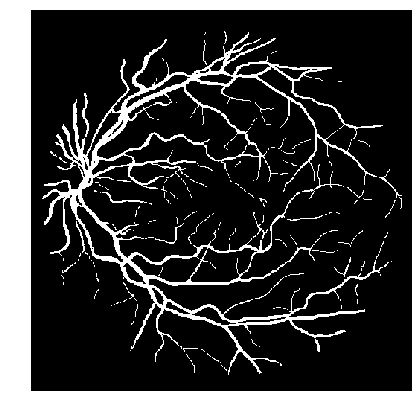

In [0]:
show_img(y[0]<0.5, figsize=(7,7));

[0.96164]


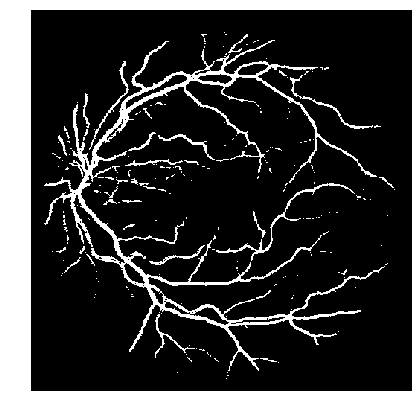

In [0]:
loadweights_circle(PATH/'tmp/checkpoint_circle.pth.tar')
x,y = next(iter(md.val_dl))
py = to_np(full(V(x))[0])
show_img(py[0]<0, figsize=(7,7))

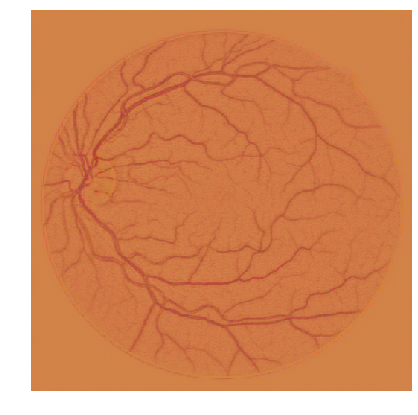

In [0]:
x,y = next(iter(md.val_dl))
py = to_np(full(V(x)))
b= denorm(py[1])
b.shape
c = (b - np.min(b))/np.ptp(b)
show_img(c[0], figsize=(7,7))

In [0]:
preds = np.zeros([1,512,512, 3])
# predsss = np.concatenate((predsss,np.ones([1,3,512,512])))

loadweights_circle(PATH/'tmp/checkpoint_circle.pth.tar')
full.eval()
val_data_iter = iter(md.val_dl)
i,n = 0,len(md.val_dl)
while i < n:
  i+=1
  real = VV(next(val_data_iter))
  val_preds = full(real[0])
  b= denorm(val_preds[1])
  c = (b - np.min(b))/np.ptp(b)
  print(c.shape)
#   print(to_np(val_preds)[1].shape)
  preds = np.concatenate((preds,c))


# def eval_circle():
#   val_epoch_acc=0
#   full.eval()
#   val_data_iter = iter(md.val_dl)
#   i,n = 0,len(md.val_dl)
#   while i < n:
#     i+=1
#     real = VV(next(val_data_iter))
#     val_preds = full(real[0])
# #     val_preds = c1(val_preds[1])
# #     val_acc = metrics.accuracy_multi(val_preds, real[1], 0.5)
#     val_acc = metrics.accuracy_multi(val_preds[0], real[1], 0.5)
# #     print(val_acc)
#     val_epoch_acc += val_acc.data
# #     print('total'), print(val_epoch_acc)
#   return (val_epoch_acc/n)

[0.96164]
(2, 512, 512, 3)
(2, 512, 512, 3)
(2, 512, 512, 3)
(2, 512, 512, 3)
(2, 512, 512, 3)
(2, 512, 512, 3)
(2, 512, 512, 3)
(2, 512, 512, 3)
(2, 512, 512, 3)
(2, 512, 512, 3)


In [0]:
preds[2].shape

(3, 512, 512)

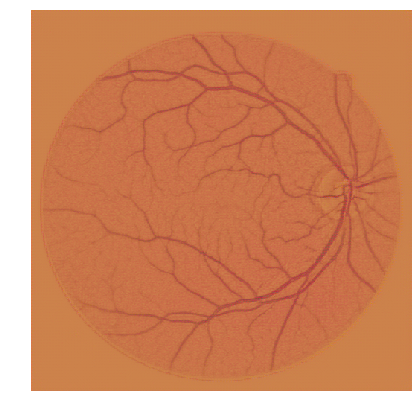

In [0]:
show_img(preds[10], figsize=(7,7))

In [0]:
c1_base = get_Circlebase()
c1 = to_gpu(Circlenet(c1_base))
models = UnetModel(m)


weights = [[[0.1 for i in range(0,sz)] for j in range(0,sz)], [[1 for i in range(0,sz)] for x in range(0,sz)]]
weights= np.reshape(weights, (2,sz,sz))
class_weights = torch.FloatTensor(weights).cuda()
criterion = nn.BCEWithLogitsLoss(weight=class_weights)


def train(niter, first=True):
  
  resume_weights = PATH/'tmp/checkpoint_circle.pth.tar'
  if resume_weights.is_file():
    # cuda = torch.cuda.is_available()
    if cuda:
      checkpoint = torch.load(resume_weights)
    else:
    # Load GPU model on CPU
      checkpoint = torch.load(resume_weights,
                                map_location=lambda storage,
                                loc: storage)
    start_epoch = checkpoint['epoch']
    best_accuracy = checkpoint['best_accuracy']
#     c1.load_state_dict(checkpoint['state_dict_c1'])
    #c2.load_state_dict(checkpoint['state_dict_c2'])
    full.load_state_dict(checkpoint['state_dict_full'])
    print("=> loaded checkpoint '{}' (trained for {} epochs)".format(resume_weights, checkpoint['epoch']))
  else:
    gen_iterations = 0
    best_accuracy = 0
    start_epoch = 0
  
  for epoch in trange(niter):
    print('epoch: {}'.format(start_epoch + epoch +1))
    data_iter = iter(md.trn_dl)
    i,n = 0,len(md.trn_dl)
    c1.train()
    
    with tqdm(total=n) as pbar:
      while i < n:
        i += 1
        real = V(next(data_iter))

        full.zero_grad()
        preds = full(real[0])
        loss = criterion(preds[0], real[1]) + featureLoss(preds[1], real[0])
        loss.backward(retain_graph = True)
        optimizerfull.step()
                
#         c1.zero_grad()
#         preds = c1(preds[1])
#         loss = criterion(preds, real[1]) 
#         loss.backward()
#         optimizer1.step()
    
        acc = metrics.accuracy_multi(preds[0], real[1], 0.5)

    validationACC= eval_circle()
    is_best = bool(to_np(validationACC) > best_accuracy)
    
#     #Get greater Tensor to keep track best acc
    best_accuracy = max(to_np(validationACC) , best_accuracy)
   
    #Save checkpoint if is a new best
    save_checkpoint_circle({
          'epoch': start_epoch + epoch + 1,
#           'state_dict_c1': c1.state_dict(),
          #'state_dict_c2': c2.state_dict(),
          'state_dict_full': full.state_dict(),
          'best_accuracy': best_accuracy
      }, is_best)
      
    
#     print(f'Unet_TrainLoss: {to_np(loss)}; Unet_TrainAcc:{to_np(acc)}')
    print(f'Unet_TrainLoss: {to_np(loss)}; Unet_TrainAcc:{to_np(acc)}; Unet_ValAcc:{to_np(validationACC)};')

In [0]:


loadweights_circle(PATH/'tmp/checkpoint_circle.pth.tar')
# c1.eval()
# c2.eval()
full.eval()
val_data_iter = iter(md.val_dl)
i,n = 0,len(md.val_dl)
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
specificity=0
sensitivity=0
roc_auc= 0
while i < n:
  i+=1
  real = V(next(val_data_iter))
#   val_preds = c1(real[0])
  val_preds = full(real[0])
  cm= confusion_matrix(to_np(real[1]).flatten(), to_np(val_preds[0]).flatten()>=-0.5)
  specificity+= cm[0][0]/(cm[0][0]+cm[0][1])
  sensitivity+= cm[1][1]/(cm[1][1]+cm[1][0])
  
#   target += list(to_np(val_preds).flatten())
#   predict += list(to_np(real[1]).flatten())
  fpr, tpr, _ = roc_curve(to_np(real[1]).flatten(), to_np(val_preds[0]).flatten())
  roc_auc += auc(fpr, tpr)
  
roc_auc = roc_auc/(n)
sensitivity = sensitivity/n
specificity= specificity/n
print(sensitivity)
print(specificity)
print(roc_auc)

[0.9643]


RuntimeError: ignored

In [0]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Post-Processing

/usr/local/lib/python3.6/dist-packages/skimage/filters/_gaussian.py:22: skimage_deprecation: Function ``gaussian_filter`` is deprecated. Use ``skimage.filters.gaussian`` instead.
  multichannel=None, preserve_range=False, truncate=4.0):


(-0.5, 511.5, 511.5, -0.5)

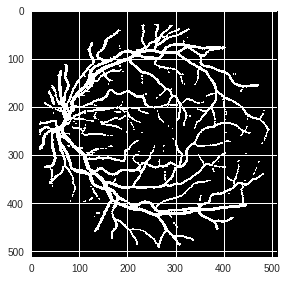

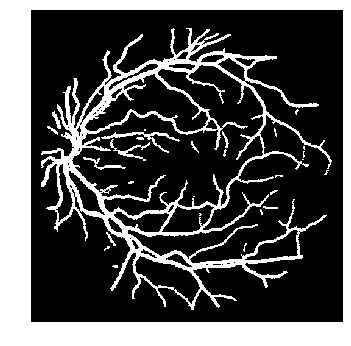

In [0]:
from skimage import measure
from skimage import filters
import matplotlib.pyplot as plt
import numpy as np

n = 12
l = 256
# np.random.seed(1)
# im = np.zeros((l, l))
# points = l * np.random.random((2, n ** 2))
# im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1

# im = plt.imread('DRIVE/images_masks_png/38_manual1.png')

# im = to_np(y[0])

im = py[0][0]>0

im = filters.gaussian_filter(im, sigma= l / (40. * n))
blobs = im > 0.7 * im.mean()

all_labels = measure.label(blobs)
blobs_labels = measure.label(blobs, background=0)

plt.figure(figsize=(12, 12))

plt.figure(figsize=(15,15))
plt.subplot(131)
plt.imshow(all_labels>0, cmap='gray')

b, count= np.unique(all_labels, return_counts=True)
org = np.argwhere(count<30)

delete= b[org]

for i in range(0,all_labels.shape[0]):
  for j in range(0,all_labels.shape[1]):
    if all_labels[i][j] in delete:
      all_labels[i][j] = 0

plt.figure(figsize=(19,19))
plt.subplot(131)
plt.imshow(all_labels<1)
plt.axis('off')

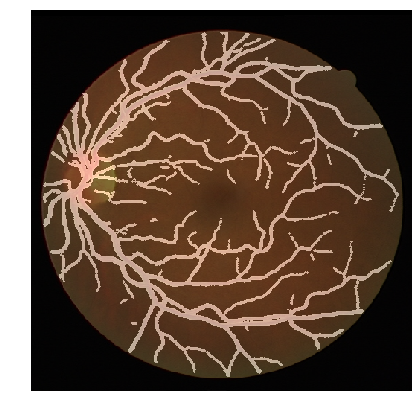

In [0]:
ax = show_img(denorm(x)[0], figsize=(7,7))
show_img(all_labels<1, ax=ax, alpha=0.5);